# Pre

In [86]:
%matplotlib inline
import numpy as np
import _tpg.tpg as tp
import matplotlib.pyplot as plt
import os
import gym
import random
from datetime import datetime

In [6]:
def log_load(title , task, renge, _step=5):
    l =[]

    with open(f"{title}.log", "r") as file:
        lines = file.readlines()
        for line in lines:
            results = line.replace('\n','').split(', ')[2:]
            # breakpoint(results)
            if len(results)<2: continue
            if f'{task}' in results[0] and 'generation:' in results[1]:
                l.append([float(re.split(':')[1]) for re in results[2:]])
                end = int(results[1].split(':')[1])

    __min = []
    __mi = 0.
    __max = []
    __ma = 0.
    __ave = []
    __av = 0.
    for i, item in enumerate(l):
        _min, _max, _ave = item
        __mi+=_min
        __ma+=_max
        __av+=_ave
        # if i==0: continue
        if i%_step==_step-1:
            __min.append(__mi/float(_step))
            __mi=0.
            __max.append(__ma/float(_step))
            __ma=0.
            __ave.append(__av/float(_step))
            __av=0.
        if i == renge: break
    mi = np.array(__min)
    ma = np.array(__max)
    av = np.array(__ave)
    
    return mi, ma, av, end

In [15]:
def log_accumlation(title, task, _renge=100, _step=5):
    l =[]

    with open(f"{title}.log", "r") as file:
        lines = file.readlines()
        for line in lines:
            results = line.replace('\n','').split(', ')[2:]
            # breakpoint(results)
            if len(results)<2: continue
            if (f'{task}' in results[0] or f'{task}' == 'any') and 'generation:' in results[1]:
                l.append([float(re.split(':')[1]) for re in results[2:]])
                end = int(results[1].split(':')[1])

    __min = [0.]
    __mi = 0.
    __max = [0.]
    __ma = 0.
    __ave = [0.]
    __av = 0.
    for i, item in enumerate(l):
        _min, _max, _ave = item
        __mi+=_min
        __ma+=_max
        __av+=_ave
        # if i==0: continue
        if i%_step==_step-1:
            __mi/=float(_step)
            __mi+=__min[-1]
            __min.append(__mi)
            __mi=0.
            __ma/=float(_step)
            __ma+=__max[-1]
            __max.append(__ma)
            __ma=0.
            __av/=float(_step)
            __av+=__ave[-1]
            __ave.append(__av)
            __av=0.
        if i == _renge: break

    mi = np.array(__min)
    ma = np.array(__max)
    av = np.array(__ave)
    
    return mi, ma, av, end


In [90]:
def test_multi_elite(tpg, _title=None):
    """ マルチタスク学習に対応できるように、改良。
    """
    tasks=[]
    archive = []

    if os.path.exists('./.tasks'):
        with open('./.tasks', 'r') as task_file:
            tasks = task_file.read().splitlines()
            random.seed(datetime.now().strftime('%Y%m%d%H%M%S'))
            random.shuffle(tasks)
            print(tasks, type(tasks))
    else:
        raise Exception('tasksDoesntExist')

    if _title:
        if os.path.exists(_title):
            tpg.load_story(_title)
        else:
            raise Exception('titleDoesntExist')
    
    try:
        for task in tasks:
            # tpg.setEnv()
            title = tpg.success_story(_task=gym.make(task))
            archive.append(title)
    except Exception as e:
        print(e)
        # os.remove('./tasks.txt')
    return archive


# chaos

### TPG

In [ ]:
prefix = '../../../Downloads/test/'
files = [
    f'{prefix}2022-12-04/',
    f'{prefix}2022-12-05/',
    f'{prefix}2022-12-05/',
    f'{prefix}2022-12-05/',
    f'{prefix}2022-12-05/',
    f'{prefix}2022-12-05/',
    f'{prefix}2022-12-05/',
    f'{prefix}2022-12-05/',
    f'{prefix}2022-12-05/',
    f'{prefix}2022-12-05/'
]

### MHTPG

In [32]:
prefix = '../../../Downloads/test/'
files = [
    f'{prefix}2022-12-04/22-12-45',
    f'{prefix}2022-12-05/10-02-26',
    f'{prefix}2022-12-05/10-26-46',
    f'{prefix}2022-12-05/10-56-46',
    f'{prefix}2022-12-05/11-20-13',
    f'{prefix}2022-12-05/11-48-00',
    f'{prefix}2022-12-05/12-19-21',
    f'{prefix}2022-12-05/12-40-11',
    f'{prefix}2022-12-05/13-06-28',
    f'{prefix}2022-12-05/13-30-22'
]

### Actor1

In [35]:
prefix = 'log/test/'
files = [
    f'{prefix}2022-12-05/07-20-22',
    f'{prefix}2022-12-05/10-03-30',
    f'{prefix}2022-12-05/10-21-47',
    f'{prefix}2022-12-05/10-41-03',
    f'{prefix}2022-12-05/11-00-45',
    f'{prefix}2022-12-05/11-18-39',
    f'{prefix}2022-12-05/11-35-38',
    f'{prefix}2022-12-05/11-55-13',
    f'{prefix}2022-12-05/12-16-18',
    f'{prefix}2022-12-05/12-36-15',
]

### Show

In [36]:
renge=100
step=5
ends = (renge//step)

mi = np.zeros(ends+1)
ma = np.zeros(ends+1)
av = np.zeros(ends+1)
end=0
for file in files:
    _mi, _ma, _av, end = log_accumlation(file,'any', _renge=renge, _step=step)
    assert _mi.size==mi.size, f'{file} {_mi.size} dont match'
    mi=np.add(mi,_mi)
    ma=np.add(ma,_ma)
    av=np.add(av,_av)
mi=np.divide(mi,10)
ma=np.divide(ma,10)
av=np.divide(av,10)
ge = np.arange((ends-mi.size)*step, ends*step, step)

plt.plot(ge, mi, label='min')
plt.plot(ge, ma, label='max')
plt.plot(ge, av, label='ave')

plt.ylabel('Score')
plt.xlabel('Generation')
plt.legend()
plt.show()

# single each

### TPG

#### ALE/Pitfall-ram-v5

In [53]:
prefix = '../../../Downloads/test/'
files = [
    f'{prefix}2022-12-06/00-27-30',
    f'{prefix}2022-12-06/01-13-37',
    f'{prefix}2022-12-05/18-12-27',
    f'{prefix}2022-12-05/18-55-45',
    f'{prefix}2022-12-05/19-43-00',
    f'{prefix}2022-12-05/20-32-31',
    f'{prefix}2022-12-05/21-21-33',
    f'{prefix}2022-12-05/22-10-14',
    f'{prefix}2022-12-05/22-54-57',
    f'{prefix}2022-12-05/23-40-53'
]
task="ALE/Pitfall-ram-v5"

#### SpaceInvaders-v0

In [44]:
prefix = '../../../Downloads/test/'
files = [
    f'{prefix}2022-12-06/00-32-30',
    f'{prefix}2022-12-06/01-18-41',
    f'{prefix}2022-12-05/18-16-57',
    f'{prefix}2022-12-05/19-00-08',
    f'{prefix}2022-12-05/19-48-13',
    f'{prefix}2022-12-05/20-37-43',
    f'{prefix}2022-12-05/21-26-49',
    f'{prefix}2022-12-05/22-15-06',
    f'{prefix}2022-12-05/22-59-12',
    f'{prefix}2022-12-05/23-45-09'
]
task="SpaceInvaders-v0"


#### Hero-ramDeterministic-v4

In [55]:
prefix = '../../../Downloads/test/'
files = [
    f'{prefix}2022-12-06/00-11-55',
    f'{prefix}2022-12-06/00-58-12',
    f'{prefix}2022-12-06/01-42-18',
    f'{prefix}2022-12-05/18-40-53',
    f'{prefix}2022-12-05/19-26-12',
    f'{prefix}2022-12-05/20-14-39',
    f'{prefix}2022-12-05/21-02-29',
    f'{prefix}2022-12-05/21-52-21',
    f'{prefix}2022-12-05/22-39-00',
    f'{prefix}2022-12-05/23-23-55'
]
task="Hero-ramDeterministic-v4"

#### MontezumaRevengeDeterministic-v0

In [57]:
prefix = '../../../Downloads/test/'
files = [
    f'{prefix}2022-12-06/00-42-45',
    f'{prefix}2022-12-06/01-28-22',
    f'{prefix}2022-12-05/18-27-30',
    f'{prefix}2022-12-05/19-10-51',
    f'{prefix}2022-12-05/19-59-25',
    f'{prefix}2022-12-05/20-47-27',
    f'{prefix}2022-12-05/21-36-45',
    f'{prefix}2022-12-05/22-25-28',
    f'{prefix}2022-12-05/23-08-50',
    f'{prefix}2022-12-05/23-55-52'
]
task="MontezumaRevengeDeterministic-v0"


#### Hero-v4

In [60]:
prefix = '../../../Downloads/test/'
files = [
    f'{prefix}2022-12-06/00-00-25',
    f'{prefix}2022-12-06/00-46-24',
    f'{prefix}2022-12-06/01-31-23',
    f'{prefix}2022-12-05/18-30-02',
    f'{prefix}2022-12-05/19-14-45',
    f'{prefix}2022-12-05/20-03-36',
    f'{prefix}2022-12-05/20-50-41',
    f'{prefix}2022-12-05/21-42-13',
    f'{prefix}2022-12-05/22-28-36',
    f'{prefix}2022-12-05/23-12-35'
]
task="Hero-v4"


#### PrivateEye-ramDeterministic-v0

In [62]:
prefix = '../../../Downloads/test/'
files = [
    f'{prefix}2022-12-06/00-37-30',
    f'{prefix}2022-12-06/01-23-24',
    f'{prefix}2022-12-05/18-22-02',
    f'{prefix}2022-12-05/19-04-50',
    f'{prefix}2022-12-05/19-53-40',
    f'{prefix}2022-12-05/20-42-27',
    f'{prefix}2022-12-05/21-30-50',
    f'{prefix}2022-12-05/22-20-03',
    f'{prefix}2022-12-05/23-03-47',
    f'{prefix}2022-12-05/23-49-02'
]
task="PrivateEye-ramDeterministic-v0"


#### ALE/Jamesbond-ram-v5

In [64]:
prefix = '../../../Downloads/test/'
files = [
    f'{prefix}2022-12-06/00-19-22',
    f'{prefix}2022-12-06/01-06-06',
    f'{prefix}2022-12-06/01-49-49',
    f'{prefix}2022-12-05/18-47-53',
    f'{prefix}2022-12-05/19-34-28',
    f'{prefix}2022-12-05/20-22-35',
    f'{prefix}2022-12-05/21-10-58',
    f'{prefix}2022-12-05/22-00-52',
    f'{prefix}2022-12-05/22-45-37',
    f'{prefix}2022-12-05/23-32-06'
]
task="ALE/Jamesbond-ram-v5"


#### ALE/WizardOfWor-v5

In [66]:
prefix = '../../../Downloads/test/'
files = [
    f'{prefix}2022-12-06/00-23-08',
    f'{prefix}2022-12-06/01-09-33',
    f'{prefix}2022-12-06/01-54-12',
    f'{prefix}2022-12-05/18-50-59',
    f'{prefix}2022-12-05/19-38-05',
    f'{prefix}2022-12-05/20-26-57',
    f'{prefix}2022-12-05/21-16-27',
    f'{prefix}2022-12-05/22-04-56',
    f'{prefix}2022-12-05/22-49-14',
    f'{prefix}2022-12-05/23-35-35'
]
task="ALE/WizardOfWor-v5"


#### DoubleDunk-ramNoFrameskip-v4

In [68]:
prefix = '../../../Downloads/test/'
files = [
    f'{prefix}2022-12-06/00-16-51',
    f'{prefix}2022-12-06/01-04-15',
    f'{prefix}2022-12-06/01-47-30',
    f'{prefix}2022-12-05/18-46-02',
    f'{prefix}2022-12-05/19-32-14',
    f'{prefix}2022-12-05/20-20-28',
    f'{prefix}2022-12-05/21-08-43',
    f'{prefix}2022-12-05/21-57-55',
    f'{prefix}2022-12-05/22-43-21',
    f'{prefix}2022-12-05/23-29-18'
]
task="DoubleDunk-ramNoFrameskip-v4"


#### PitfallDeterministic-v4

In [70]:
prefix = '../../../Downloads/test/'
files = [
    f'{prefix}2022-12-06/00-05-48',
    f'{prefix}2022-12-06/00-51-54',
    f'{prefix}2022-12-06/01-36-39',
    f'{prefix}2022-12-05/18-35-06',
    f'{prefix}2022-12-05/19-20-43',
    f'{prefix}2022-12-05/20-08-39',
    f'{prefix}2022-12-05/20-55-44',
    f'{prefix}2022-12-05/21-47-05',
    f'{prefix}2022-12-05/22-33-58',
    f'{prefix}2022-12-05/23-17-36'
]
task="PitfallDeterministic-v4"


#### Show

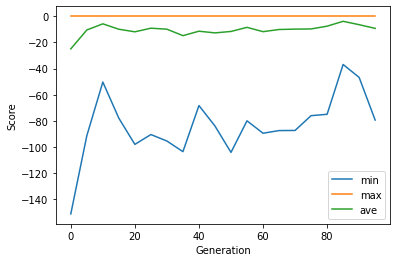

In [71]:
renge=100
step=5
ends = (renge//step)

mi = np.zeros(ends)
ma = np.zeros(ends)
av = np.zeros(ends)
end=0
for file in files:
    _mi, _ma, _av, end = log_load(file,task, renge=renge, _step=step)
    assert _mi.size==mi.size, f'{file} {_mi.size} dont match'
    mi=np.add(mi,_mi)
    ma=np.add(ma,_ma)
    av=np.add(av,_av)
mi=np.divide(mi,10)
ma=np.divide(ma,10)
av=np.divide(av,10)
ge = np.arange((ends-mi.size)*step, ends*step, step)

title = f"./results/tpg-{task.replace('/','-')}"
plt.plot(ge, mi, label='min')
plt.plot(ge, ma, label='max')
plt.plot(ge, av, label='ave')

plt.ylabel('Score')
plt.xlabel('Generation')
plt.legend()
plt.savefig(f"{title}.png")
plt.show()
with open(f'{title}.txt','w') as f:
    f.write(f'min-min:{min(mi)}, max-min:{min(ma)}, ave-min:{min(av)}, ')
    f.write(f'min-max:{max(mi)}, max-max:{max(ma)}, ave-max:{max(av)}, ')
    f.write(f'min-ave:{sum(mi)/len(mi)}, max-ave:{sum(ma)/len(ma)}, ave-ave:{sum(av)/len(av)}')


### MHTPG

# multi elite

### TPG

In [91]:
prefix = '../../../Downloads/test/'
graphs = [
    f'{prefix}2022-12-06/16-20-12',
    f'{prefix}2022-12-06/17-02-25',
    f'{prefix}2022-12-06/17-44-30',
    f'{prefix}2022-12-06/18-58-52',
    f'{prefix}2022-12-06/19-52-11',
    f'{prefix}2022-12-06/20-29-42',
    f'{prefix}2022-12-06/21-29-47',
    f'{prefix}2022-12-06/22-21-45',
    f'{prefix}2022-12-06/23-10-06',
    f'{prefix}2022-12-06/23-55-21'
]
tpg = tp._TPG()

### MHTPG

In [80]:
prefix = '../../../Downloads/test/'
graphs = [
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/'
]
tpg = tp.MHTPG()

### Actor1

In [82]:
prefix = '../../../Downloads/test/'
graphs = [
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/'
]
tpg = tp.Actor1()

### Actor2

In [83]:
prefix = '../../../Downloads/test/'
graphs = [
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/',
    f'{prefix}2022-12-06/'
]
tpg = tp.Actor2()

### Show

In [92]:

for graph in graphs:
    archive = test_multi_elite(tpg)

['PrivateEye-ramDeterministic-v0', 'Hero-ramDeterministic-v4', 'ALE/Jamesbond-ram-v5', 'DoubleDunk-ramNoFrameskip-v4', 'PitfallDeterministic-v4', 'MontezumaRevengeDeterministic-v0', 'ALE/Pitfall-ram-v5', 'ALE/WizardOfWor-v5', 'Hero-v4', 'SpaceInvaders-v0'] <class 'list'>
argument of type 'TimeLimit' is not iterable
['ALE/WizardOfWor-v5', 'PrivateEye-ramDeterministic-v0', 'ALE/Pitfall-ram-v5', 'DoubleDunk-ramNoFrameskip-v4', 'ALE/Jamesbond-ram-v5', 'SpaceInvaders-v0', 'Hero-ramDeterministic-v4', 'PitfallDeterministic-v4', 'Hero-v4', 'MontezumaRevengeDeterministic-v0'] <class 'list'>
argument of type 'TimeLimit' is not iterable
['ALE/WizardOfWor-v5', 'PrivateEye-ramDeterministic-v0', 'ALE/Pitfall-ram-v5', 'DoubleDunk-ramNoFrameskip-v4', 'ALE/Jamesbond-ram-v5', 'SpaceInvaders-v0', 'Hero-ramDeterministic-v4', 'PitfallDeterministic-v4', 'Hero-v4', 'MontezumaRevengeDeterministic-v0'] <class 'list'>
argument of type 'TimeLimit' is not iterable
['ALE/WizardOfWor-v5', 'PrivateEye-ramDeterminist

A.L.E: Arcade Learning Environment (version 0.7.5+db37282)
[Powered by Stella]


argument of type 'TimeLimit' is not iterable
['ALE/WizardOfWor-v5', 'PrivateEye-ramDeterministic-v0', 'ALE/Pitfall-ram-v5', 'DoubleDunk-ramNoFrameskip-v4', 'ALE/Jamesbond-ram-v5', 'SpaceInvaders-v0', 'Hero-ramDeterministic-v4', 'PitfallDeterministic-v4', 'Hero-v4', 'MontezumaRevengeDeterministic-v0'] <class 'list'>
argument of type 'TimeLimit' is not iterable
['ALE/WizardOfWor-v5', 'PrivateEye-ramDeterministic-v0', 'ALE/Pitfall-ram-v5', 'DoubleDunk-ramNoFrameskip-v4', 'ALE/Jamesbond-ram-v5', 'SpaceInvaders-v0', 'Hero-ramDeterministic-v4', 'PitfallDeterministic-v4', 'Hero-v4', 'MontezumaRevengeDeterministic-v0'] <class 'list'>
argument of type 'TimeLimit' is not iterable
['ALE/WizardOfWor-v5', 'PrivateEye-ramDeterministic-v0', 'ALE/Pitfall-ram-v5', 'DoubleDunk-ramNoFrameskip-v4', 'ALE/Jamesbond-ram-v5', 'SpaceInvaders-v0', 'Hero-ramDeterministic-v4', 'PitfallDeterministic-v4', 'Hero-v4', 'MontezumaRevengeDeterministic-v0'] <class 'list'>
argument of type 'TimeLimit' is not iterable
['AL